In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [87]:
## Reading in stats.csv, calculating each relevant stat's correlation with margin
## Margin is positive for a winning team, negative for a losing team
stats = pd.read_csv("stats.csv")
stats

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,FreesAgainst,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed
0,Geelong,"Dangerfield, Patrick",5/4/90,189,92,"Midfield, Forward",2016,R23,27/8/16,155.0,...,1,3,17,16,0,0,0,1,6,85
1,Greater Western Sydney,"Kelly, Josh",12/2/95,184,82,Midfield,2018,R20,5/8/18,151.0,...,0,3,22,21,0,1,2,2,4,95
2,Collingwood,"Swan, Dane",25/2/84,185,93,Midfield,2015,R3,17/4/15,140.0,...,0,3,17,22,0,1,4,0,3,87
3,Essendon,"Zaharakis, David",21/2/90,180,79,Midfield,2017,R22,19/8/17,90.0,...,0,3,10,28,0,0,2,0,3,89
4,Gold Coast,"Sexton, Alex",3/12/93,186,84,Forward,2016,R18,23/7/16,105.0,...,1,0,7,17,0,1,0,0,3,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63707,Richmond,"Conca, Reece",12/8/92,181,83,Midfield,2013,EF,8/9/13,96.0,...,0,0,0,0,0,0,0,0,0,8
63708,St Kilda,"Dennis-Lane, Trent",30/8/88,182,75,Forward,2013,R1,30/3/13,77.0,...,0,0,0,0,0,0,0,0,0,25
63709,Adelaide,"Petrenko, Jared",22/12/89,178,81,Forward,2012,R4,21/4/12,96.0,...,0,0,0,0,0,0,0,0,0,1
63710,Carlton,"McInnes, Andrew",20/3/92,191,87,Defender,2012,R22,25/8/12,86.0,...,0,0,0,0,0,0,0,0,0,1


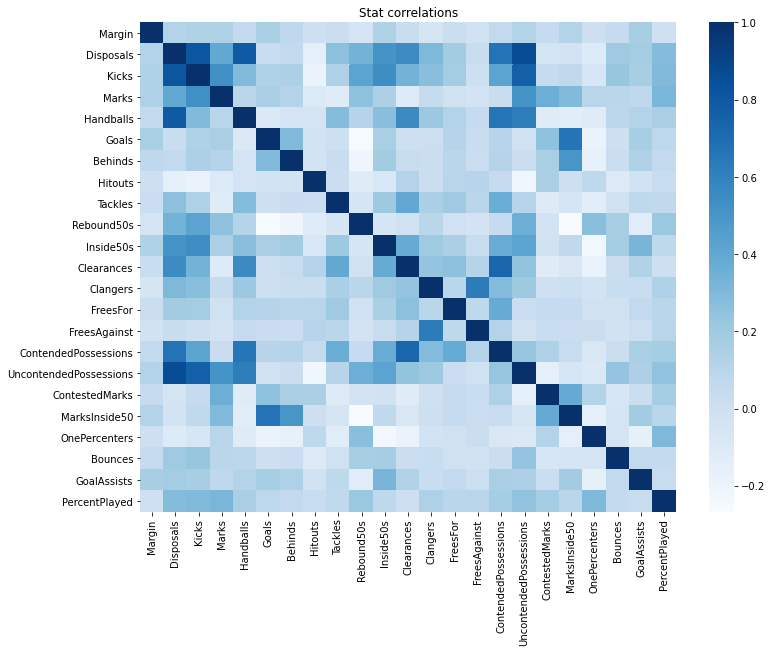

In [88]:
## Dropping non-in-game stats
corr = stats.drop(["Score", "Height", "Weight", "BrownlowVotes", "Season"], axis = 1).corr()

plt.figure(figsize = (12,9))
sn.heatmap(corr, cmap = "Blues")
plt.title("Stat correlations")
plt.show()

In [89]:
## Of particular interest are the correlations between various stats and ultimate game margin
margin_corr = corr["Margin"].sort_values(ascending = False).drop("Margin")
margin_corr

GoalAssists               0.171273
Goals                     0.165482
Marks                     0.140960
Kicks                     0.137726
Inside50s                 0.137442
UncontendedPossessions    0.128609
Disposals                 0.127110
MarksInside50             0.124467
Behinds                   0.076345
ContendedPossessions      0.065979
Handballs                 0.065791
ContestedMarks            0.053661
Bounces                   0.052801
Clearances                0.030578
FreesFor                  0.022983
Tackles                   0.019528
OnePercenters             0.006530
Hitouts                   0.005791
PercentPlayed            -0.000122
FreesAgainst             -0.023000
Rebound50s               -0.044184
Clangers                 -0.049729
Name: Margin, dtype: float64

In [ ]:
## As could probably be predicted, stats related with scoring, such as goals and goal assists are the most
## correlated with margin, while negative stats like clangers and frees against are negatively correlated with margin

In [90]:
## We can now use these correlations to provide a weighting for each stat, to calculate an overall score
## for a player's match
ratings = []
for i in stats.index:
    rating = 0
    for stat in margin_corr.index:
        rating += stats.loc[i, stat] * margin_corr[stat]
    ratings.append(rating)

stats["Ratings"] = ratings
stats

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,BrownlowVotes,ContendedPossessions,UncontendedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed,Ratings
0,Geelong,"Dangerfield, Patrick",5/4/90,189,92,"Midfield, Forward",2016,R23,27/8/16,155.0,...,3,17,16,0,0,0,1,6,85,14.872482
1,Greater Western Sydney,"Kelly, Josh",12/2/95,184,82,Midfield,2018,R20,5/8/18,151.0,...,3,22,21,0,1,2,2,4,95,18.679846
2,Collingwood,"Swan, Dane",25/2/84,185,93,Midfield,2015,R3,17/4/15,140.0,...,3,17,22,0,1,4,0,3,87,16.967466
3,Essendon,"Zaharakis, David",21/2/90,180,79,Midfield,2017,R22,19/8/17,90.0,...,3,10,28,0,0,2,0,3,89,16.466217
4,Gold Coast,"Sexton, Alex",3/12/93,186,84,Forward,2016,R18,23/7/16,105.0,...,0,7,17,0,1,0,0,3,90,12.675380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63707,Richmond,"Conca, Reece",12/8/92,181,83,Midfield,2013,EF,8/9/13,96.0,...,0,0,0,0,0,0,0,0,8,-0.000975
63708,St Kilda,"Dennis-Lane, Trent",30/8/88,182,75,Forward,2013,R1,30/3/13,77.0,...,0,0,0,0,0,0,0,0,25,-0.003046
63709,Adelaide,"Petrenko, Jared",22/12/89,178,81,Forward,2012,R4,21/4/12,96.0,...,0,0,0,0,0,0,0,0,1,-0.000122
63710,Carlton,"McInnes, Andrew",20/3/92,191,87,Defender,2012,R22,25/8/12,86.0,...,0,0,0,0,0,0,0,0,1,-0.000122


In [95]:
stats.to_csv("stats_with_ratings.csv")